In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**1.Analyze the data**

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**2.Create a model using ANN**

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.8878 - accuracy: 0.3278
Epoch 2/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6602 - accuracy: 0.4049
Epoch 3/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.5799 - accuracy: 0.4337
Epoch 4/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.5295 - accuracy: 0.4526
Epoch 5/5
1563/1563 [==============================] - 126s 81ms/step - loss: 1.4917 - accuracy: 0.4683


In [11]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 23ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      1000
           1       0.78      0.30      0.44      1000
           2       0.41      0.27      0.32      1000
           3       0.23      0.71      0.35      1000
           4       0.63      0.14      0.23      1000
           5       0.48      0.20      0.28      1000
           6       0.58      0.43      0.49      1000
           7       0.46      0.66      0.54      1000
           8       0.69      0.53      0.60      1000
           9       0.48      0.67      0.56      1000

    accuracy                           0.44     10000
   macro avg       0.53      0.44      0.44     10000
weighted avg       0.53      0.44      0.44     10000



**3.Create another model using CNN**

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.5370 - accuracy: 0.4446
Epoch 2/5
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1754 - accuracy: 0.5863
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0434 - accuracy: 0.6345
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9635 - accuracy: 0.6641
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8981 - accuracy: 0.6879


In [15]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9968 - accuracy: 0.6613


[0.9968279004096985, 0.661300003528595]

**5.Show the prediction for any unseen image**

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

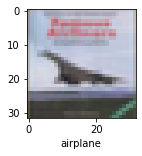

In [19]:
plot_sample(X_test, y_test,3)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 9, 8, 0, 4]

In [22]:
classes[y_classes[3]]

'airplane'